In [14]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import pywt
import seaborn as sns

In [50]:
samplerate, data = wavfile.read('../data/training/MR/New_MR_002.wav');  # Reading the audio file
t = np.arange(len(data)) / float(samplerate);  # Retrieving Time

print("data -> ", data)
print("data length -> ", len(data))
print("np.arange(len(data)) -> ", np.arange(len(data)))
print("float(samplerate) -> ", float(samplerate))
print("time -> ", t)

data = data/max(data);  # Normalize Audio Data
print("normalized data -> ", data)

data ->  [-35 -15  19 ... 131 112  96]
data length ->  16676
np.arange(len(data)) ->  [    0     1     2 ... 16673 16674 16675]
float(samplerate) ->  8000.0
time ->  [0.000000e+00 1.250000e-04 2.500000e-04 ... 2.084125e+00 2.084250e+00
 2.084375e+00]
normalized data ->  [-0.00203844 -0.00087362  0.00110658 ...  0.00762959  0.00652301
  0.00559115]


In [51]:
cA, cD = pywt.dwt(data, 'bior6.8', 'per') # ini DWT
y = pywt.idwt(cA, cD, 'bior6.8', 'per') # ini IDWT
wavfile.write('sampleY.wav', samplerate, y) # save y
wavfile.write('sampleCA.wav', samplerate, cA) # save cA
wavfile.write('sampleCD.wav', samplerate, cD) # save cD

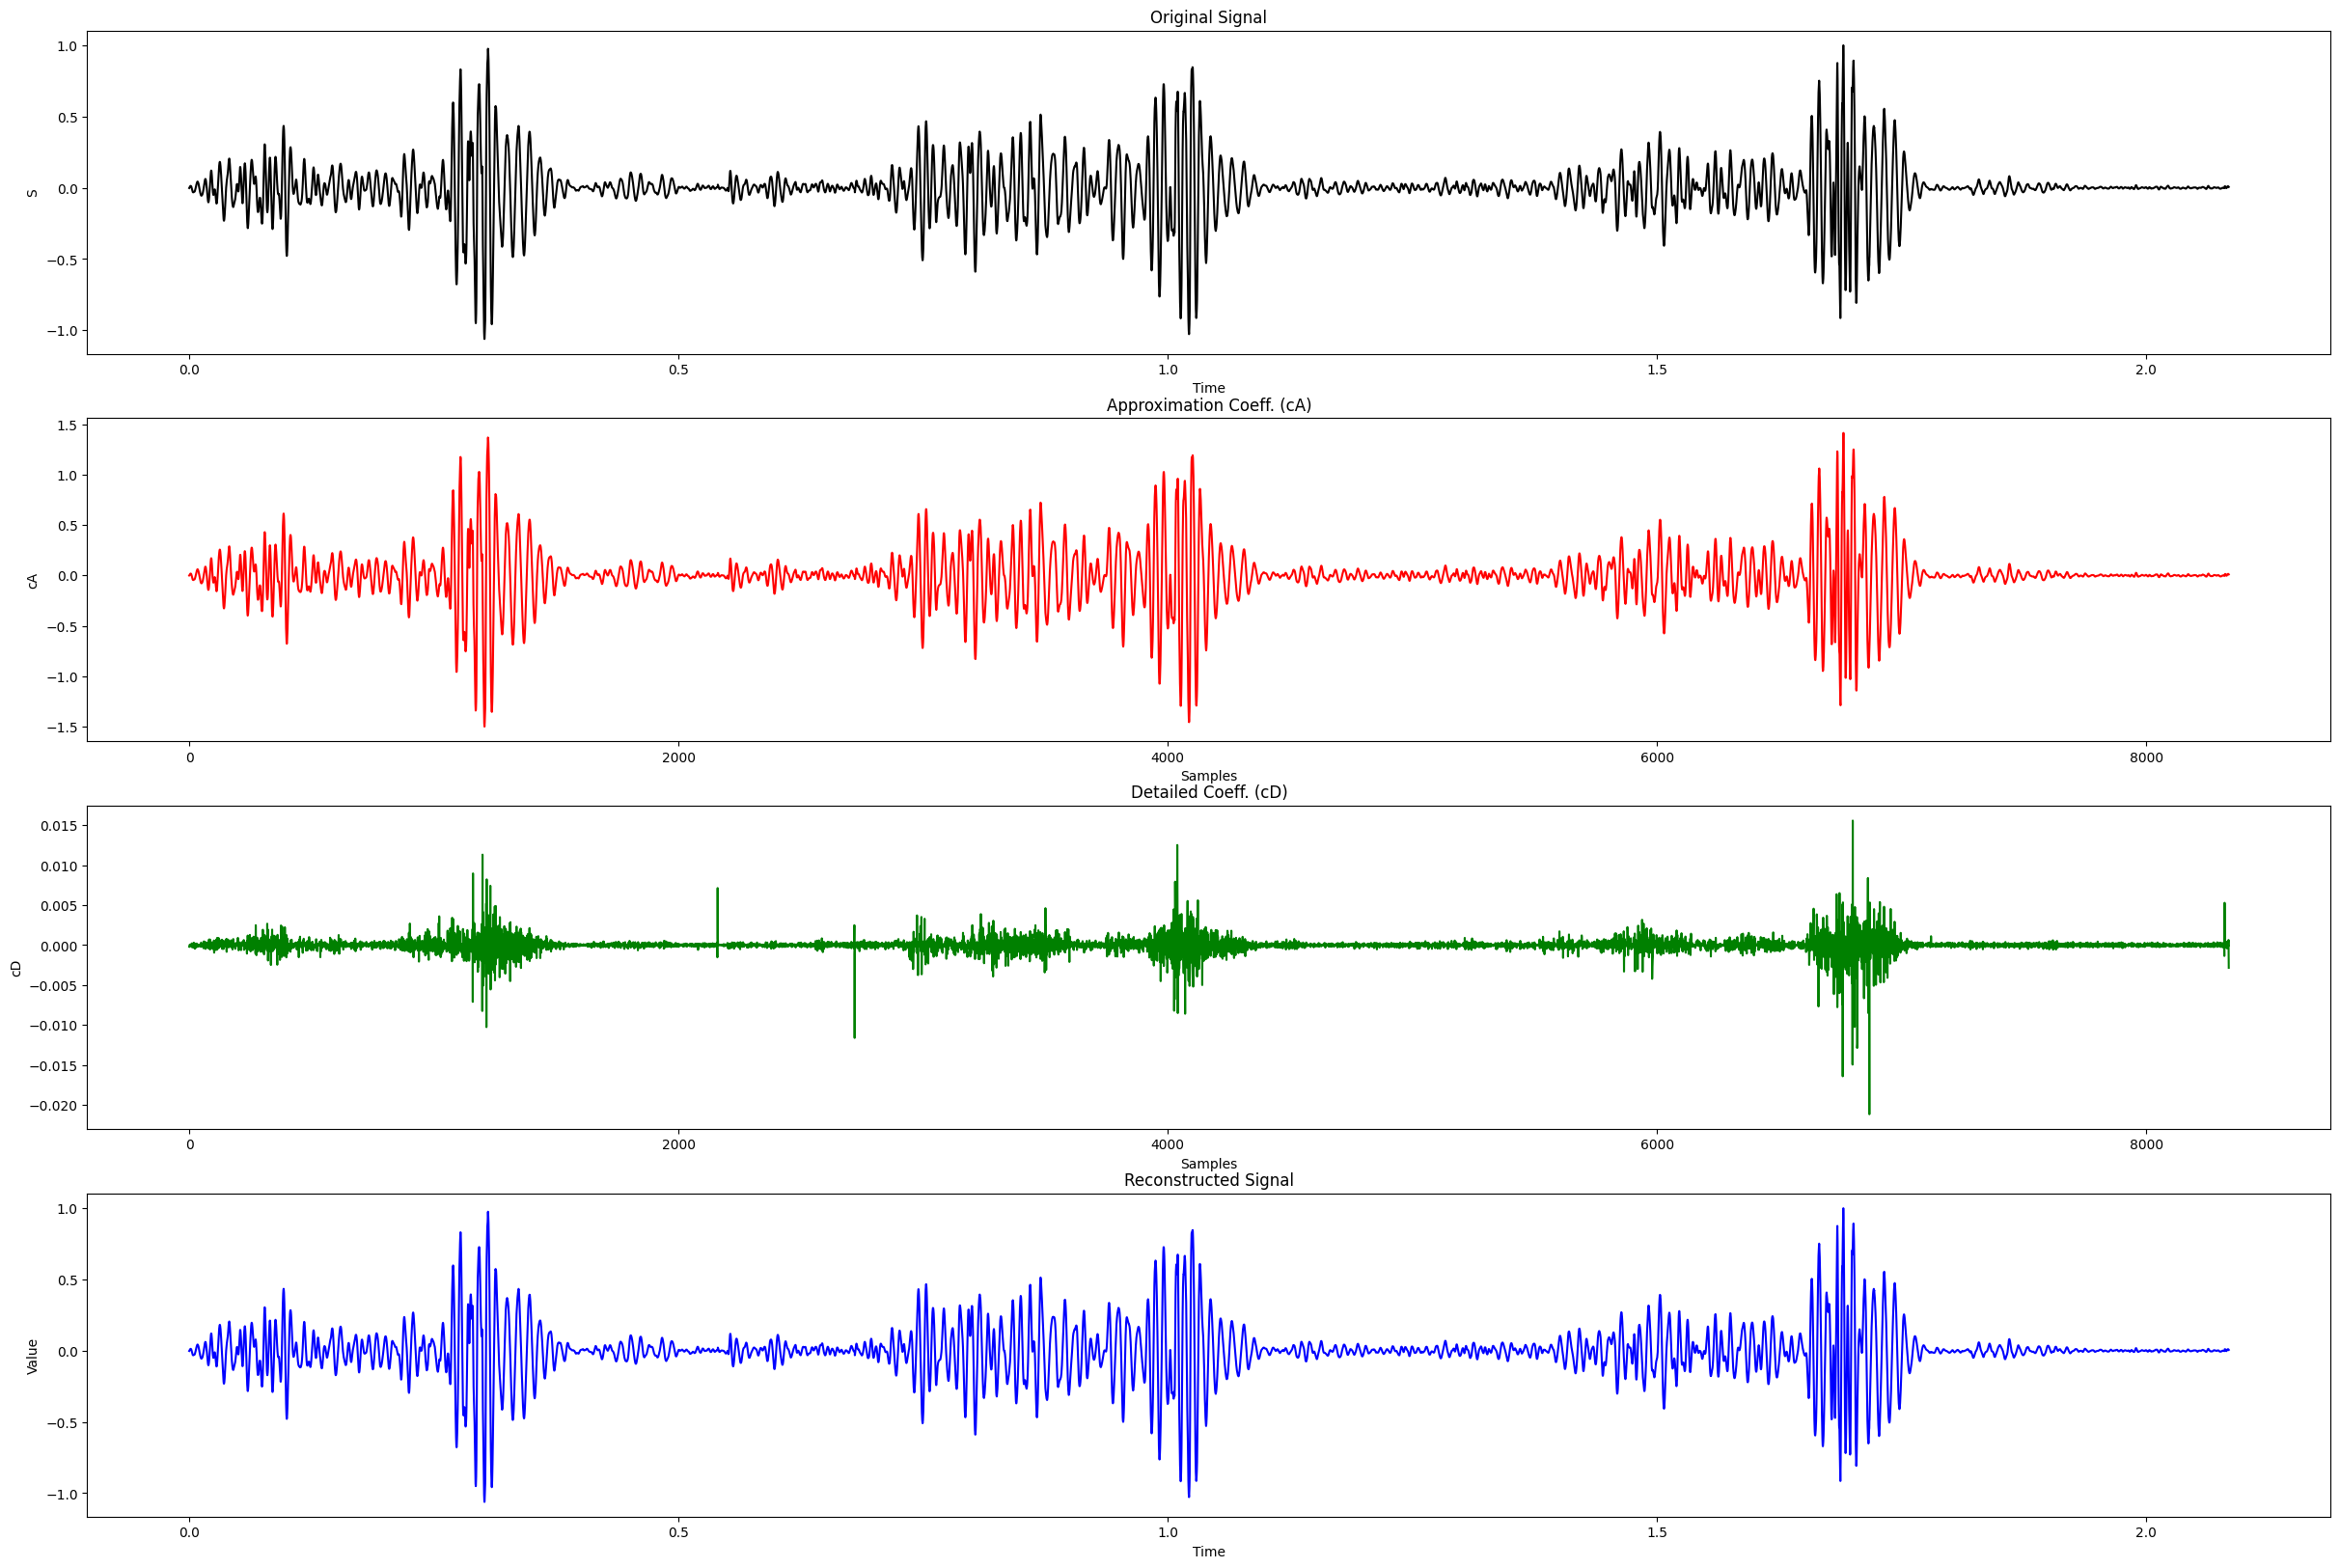

In [52]:
# Formatting for figure
L = len(data);
y = y[0:L];  # Matching length with input for plotting

plt.figure(figsize=(30, 20));

plt.subplot(4, 1, 1)
plt.plot(t, data, color='k');
plt.xlabel('Time');
plt.ylabel('S');
plt.title('Original Signal');

plt.subplot(4, 1, 2)
plt.plot(cA, color='r');
plt.xlabel('Samples');
plt.ylabel('cA');
plt.title('Approximation Coeff. (cA)');

plt.subplot(4, 1, 3)
plt.plot(cD, color='g');
plt.xlabel('Samples');
plt.ylabel('cD');
plt.title('Detailed Coeff. (cD)');

plt.subplot(4, 1, 4)
plt.plot(t, y, color='b');
plt.xlabel('Time');
plt.ylabel('Value');
plt.title('Reconstructed Signal');

plt.savefig('plot.png', dpi=100)  # Saving plot as PNG image
plt.show()

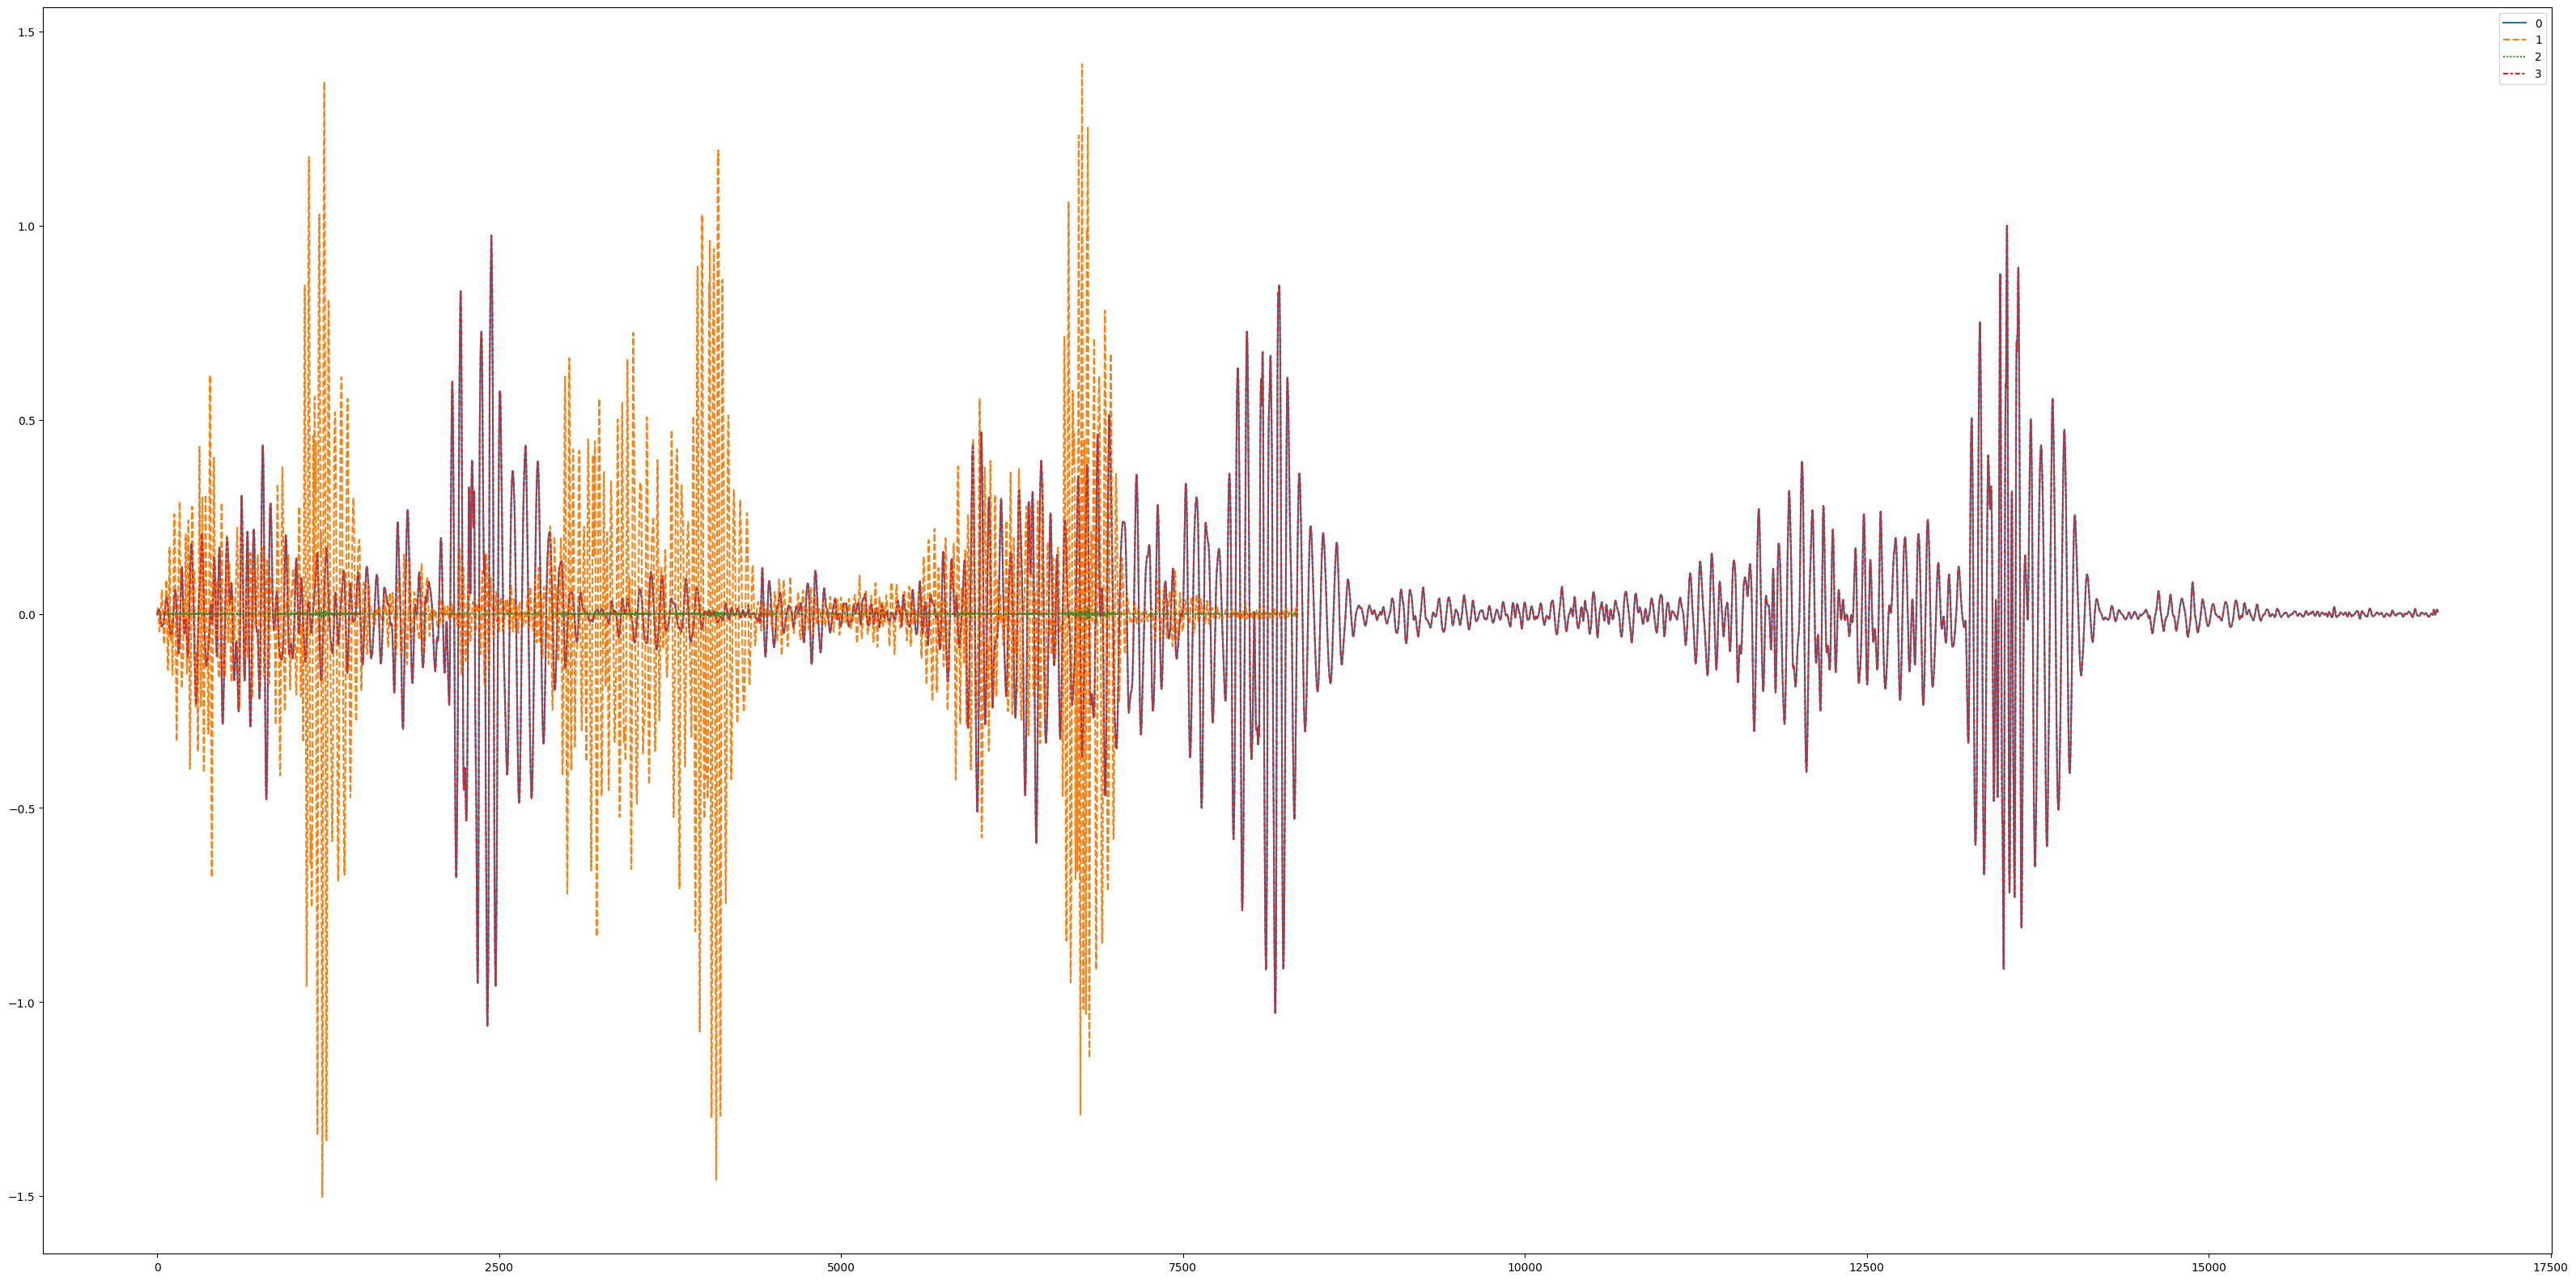

In [55]:
plt.figure(figsize=(40,20))
z = [data, cA, cD, y]
sns.lineplot(data=z)
plt.show()

In [57]:
import os
dataset_path = '../data/training/'

In [83]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
          semantic_label = dirpath.split("/")[-1]
          for f in filenames:
            file_path = os.path.join(dirpath, f)
            # print(file_path)
            samplerate, data = wavfile.read(file_path);  # Reading the audio file
            t = np.arange(len(data)) / float(samplerate);  # Retrieving Time

            print("data -> ", data)
            print("data length -> ", len(data))
            print("np.arange(len(data)) -> ", np.arange(len(data)))
            print("float(samplerate) -> ", float(samplerate))
            print("time -> ", t)

            data = data/max(data);  # Normalize Audio Data
            # print("normalized data -> ", data)

            cA, cD = pywt.dwt(data, 'bior6.8', 'per') # ini DWT
            y = pywt.idwt(cA, cD, 'bior6.8', 'per') # ini IDWT
            wavfile.write(f'data/DWT/{semantic_label}/{f}', samplerate, y) # save y
            # wavfile.write('sampleCA.wav', samplerate, cA) # save cA
            # wavfile.write('sampleCD.wav', samplerate, cD) # save cD

data ->  [-18 -20 -21 ... -67 -62 -55]
data length ->  19513
np.arange(len(data)) ->  [    0     1     2 ... 19510 19511 19512]
float(samplerate) ->  8000.0
time ->  [0.000000e+00 1.250000e-04 2.500000e-04 ... 2.438750e+00 2.438875e+00
 2.439000e+00]
data ->  [-12 -11 -12 ...  21  31  28]
data length ->  17554
np.arange(len(data)) ->  [    0     1     2 ... 17551 17552 17553]
float(samplerate) ->  8000.0
time ->  [0.000000e+00 1.250000e-04 2.500000e-04 ... 2.193875e+00 2.194000e+00
 2.194125e+00]
data ->  [  8   6   4 ... -47 -55 -51]
data length ->  17868
np.arange(len(data)) ->  [    0     1     2 ... 17865 17866 17867]
float(samplerate) ->  8000.0
time ->  [0.000000e+00 1.250000e-04 2.500000e-04 ... 2.233125e+00 2.233250e+00
 2.233375e+00]
data ->  [ 56  83 118 ...  -7 -18 -26]
data length ->  12604
np.arange(len(data)) ->  [    0     1     2 ... 12601 12602 12603]
float(samplerate) ->  8000.0
time ->  [0.000000e+00 1.250000e-04 2.500000e-04 ... 1.575125e+00 1.575250e+00
 1.575375e+